Purpose: This program processes data from a CSV file to analyze trends and patterns. It generates various graphs, isolates key features like peaks, and performs computations such as mechanical energy and its derivatives.

Technologies Used:
pandas: For efficient data manipulation and analysis.
numpy: For numerical operations and curve fitting.
matplotlib: For visualizing data through detailed graphs.


This program also incorporates methods to calculate averages, identify peaks, and analyze energy metrics, providing insights into the dataset's behavior.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('processed_run1.csv', header=None)
# The table has columns of time, position, velocity, acceleration
data.head()

,0,1,2,3
0,0.00,0.290521,-0.005621,-4.940523
1,0.05,0.281089,-0.289263,-4.010242
2,0.10,0.257078,-0.467433,-1.649152
3,0.15,0.227238,-0.478294,1.285033
4,0.20,0.202027,-0.318990,3.752356


In [3]:
# Find the average position of the points
avg = 0
for i in range(len(data[1])):
    avg += data[1][i]
avg /= len(data[1])
avg

0.24039254068791988

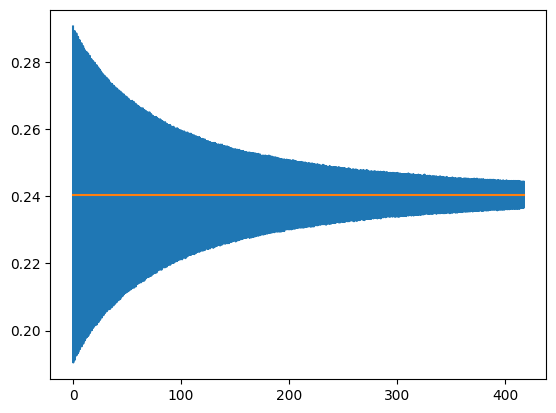

In [4]:
#draw a horizontal line through the data with the y value being the average position of the points
plt.plot(data[0], data[1])
plt.plot([0, data[0][len(data[0])-1]], [avg, avg])
plt.show()

In [5]:
#find maximum point
maxt = 0
maxx = 0
for i in range(len(data[1])):
    if data[1][i] > maxx:
        maxx = data[1][i]
        maxt = data[0][i]
print(f'({maxt}, {maxx})')

(0.0, 0.290521)


In [6]:
#find minimum point
mint = 0
minx = 1
for i in range(len(data[1])):
    if data[1][i] < minx:
        minx = data[1][i]
        mint = data[0][i]
print(f'({mint}, {minx})')

(0.25, 0.1905365)


In [7]:
#log min and max points and their differences to the average
print("max: " + str(maxx) + " at " + str(maxt) + " difference: " + str(maxx - avg))
print("min: " + str(minx) + " at " + str(mint) + " difference: " + str(minx - avg))
print("(max+min)/2 " + str((maxx+minx)/2) + " difference: " + str((maxx+minx)/2 - avg))

max: 0.290521 at 0.0 difference: 0.0501284593120801
min: 0.1905365 at 0.25 difference: -0.04985604068791988
(max+min)/2 0.24052874999999999 difference: 0.00013620931208011


The difference is small for the average and (max+min)/2, so the average is approximately equal to the middle of the range of the data.

In [8]:
#create a list of the peak points and their times
#peak point is defined as the point to the left is non existent or lower and the point to the right is non existent or lower
peakpoints = []
for i in range(len(data[1])):
    if i == 0:
        if data[1][i] > data[1][i+1]:
            peakpoints.append([data[0][i], data[1][i], data[2][i], data[3][i]])
    elif i == len(data[1])-1:
        if data[1][i] > data[1][i-1]:
            peakpoints.append([data[0][i], data[1][i], data[2][i], data[3][i]])
    else:
        if data[1][i] > data[1][i-1] and data[1][i] > data[1][i+1]:
            peakpoints.append([data[0][i], data[1][i], data[2][i], data[3][i]])

peakpoints[0:10]

[[0.0, 0.290521, -0.00562138888889, -4.94052330247],
 [0.5, 0.2889775, 0.094325, -4.79861234568],
 [1.0499999999999998, 0.288806, -0.102995277778, -4.77950385802],
 [1.5499999999999998, 0.289149, -0.005145, -4.82613703704],
 [2.05, 0.28812, 0.0882272222222, -4.71042746914],
 [2.6000000000000005, 0.2872625, -0.105663055556, -4.62748287037],
 [3.1000000000000005, 0.288463, -0.008575, -4.73832268519],
 [3.6000000000000005, 0.2872625, 0.0866075, -4.61806095679],
 [4.15, 0.2865765, -0.104996111111, -4.54787299383],
 [4.65, 0.287434, -0.00990888888889, -4.62584197531]]

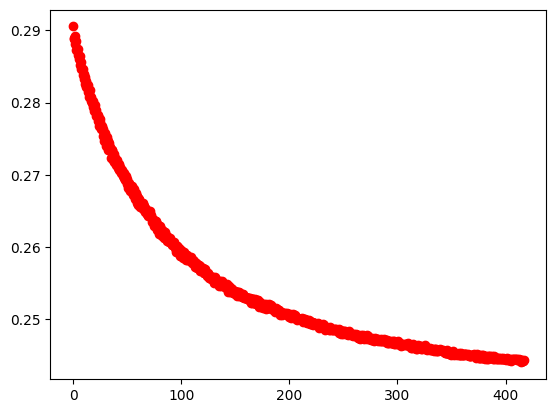

<Figure size 7680x5760 with 0 Axes>

In [9]:
#save peakpoints
peakpointscsv = pd.DataFrame(peakpoints)
peakpointscsv.to_csv('peakpoints.csv', header=False, index=False)

#graph peak points
for i in range(len(peakpoints)):
    plt.plot(peakpoints[i][0], peakpoints[i][1], 'ro')
plt.figure(dpi=1200)
plt.show()

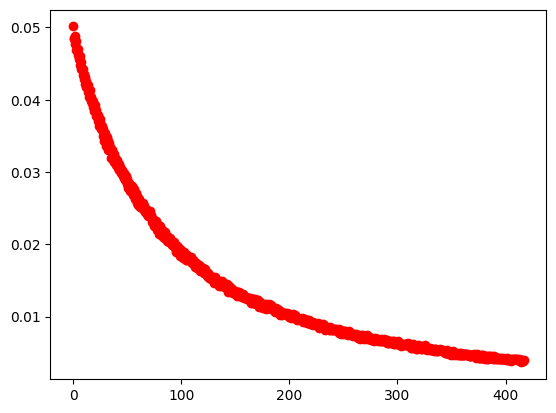

In [10]:
#calculate and update in list peak point differences from average (normalizing the graph to 0
for i in range(len(peakpoints)):
    peakpoints[i] = [peakpoints[i][0], peakpoints[i][1] - avg]

#plot peakpoints[0] vs peakpoints[1]
for i in range(len(peakpoints)):
    plt.plot(peakpoints[i][0], peakpoints[i][1], 'ro')
plt.show()

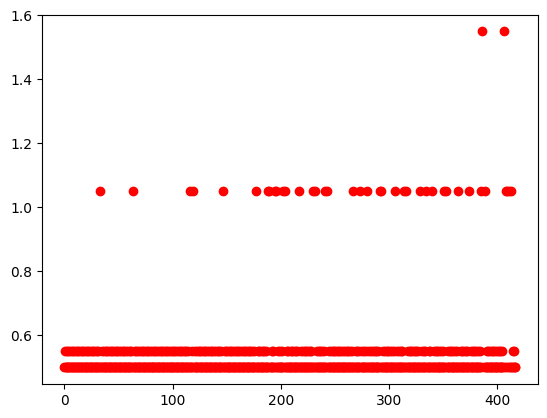

In [11]:
#calculate difference in time between peaks and graph and store in new list
peakpointstime = []
for i in range(len(peakpoints)-1):
    peakpointstime.append([peakpoints[i][0], peakpoints[i+1][0] - peakpoints[i][0]])
    plt.plot(peakpointstime[i][0], peakpointstime[i][1], 'ro')
plt.show()

The peak points occur at very consistent times. meaning most peaks evaluated are correct, however some peaks may have been missed, leading to the peaks found at higher levels.

C:\Users\Stealth\AppData\Local\Temp\ipykernel_47316\3837182216.py:2: RankWarning: Polyfit may be poorly conditioned
  curve = np.polyfit(peakpoints[0], peakpoints[1], 2)


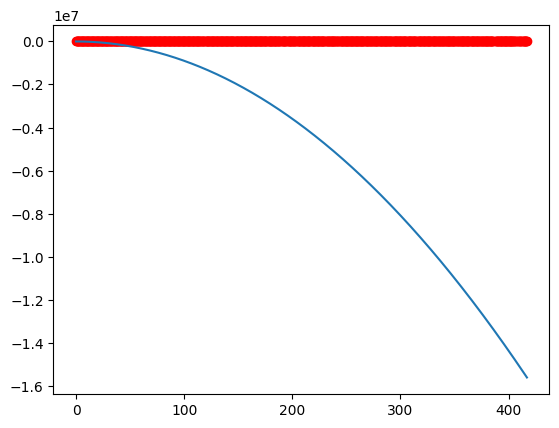

In [12]:
#using peakpoints curve fit a function and output the function
curve = np.polyfit(peakpoints[0], peakpoints[1], 2)
# print(curve)

#graph the polyfit
x = np.linspace(0, peakpoints[len(peakpoints)-1][0], len(peakpoints)-1)
y = np.polyval(curve, x)
for i in range(len(peakpoints)):
    plt.plot(peakpoints[i][0], peakpoints[i][1], 'ro')
plt.plot(x, y)
plt.show()

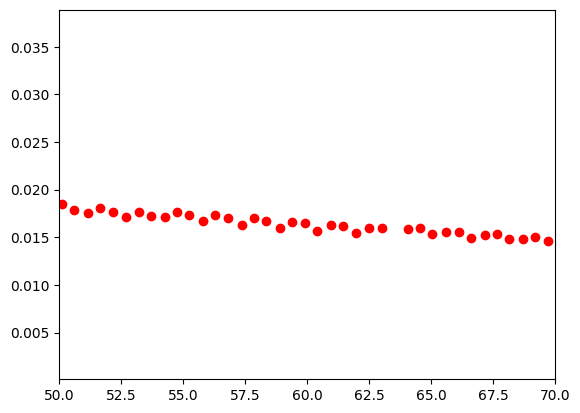

In [13]:
#calculate mechanical energy: mgh + 1/2mv^2 + kdeltax^2/2
#h is difference from avg
#v is 0
#k is spring constant of 10
#deltax is difference from avg
#m is mass of 50g
#output: mechanical energy vs time
mechanicalenergy = []
for i in range(len(peakpoints)):
    mechanicalenergy.append([peakpoints[i][0], 0.05*9.8*peakpoints[i][1] + 10*peakpoints[i][1]*peakpoints[i][1]/2])
    plt.plot(mechanicalenergy[i][0], mechanicalenergy[i][1], 'ro')
plt.xlim(50,70)
plt.show()

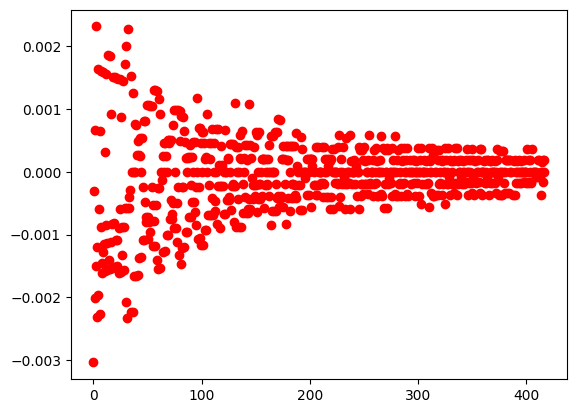

In [14]:
#graph the discrete derivative of the mechanical energy
mechanicalenergyderivative = []
for i in range(len(mechanicalenergy)-1):
    mechanicalenergyderivative.append([mechanicalenergy[i][0], (mechanicalenergy[i+1][1] - mechanicalenergy[i][1])/(mechanicalenergy[i+1][0] - mechanicalenergy[i][0])])
    plt.plot(mechanicalenergyderivative[i][0], mechanicalenergyderivative[i][1], 'ro')
    # plt.ylim(-1,1)
    # plt.ylabel("change in mechanical energy")
    # plt.xlim(0,500)
plt.show()

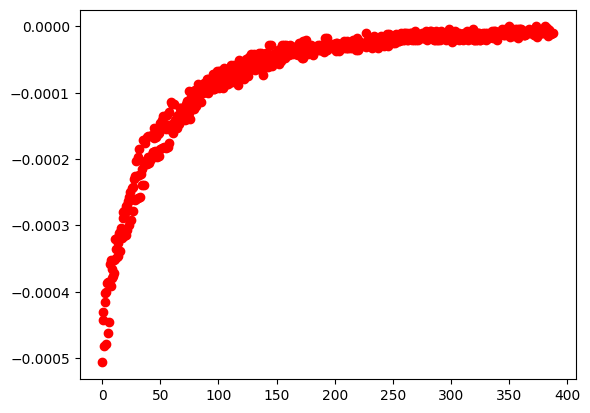

767


In [15]:
#calculate the discrete derivative of the mechanical energy with a difference of 3 points
mechanicalenergyderivative2 = []
for i in range(len(mechanicalenergy)-50):
    mechanicalenergyderivative2.append([mechanicalenergy[i][0], (mechanicalenergy[i+50][1] - mechanicalenergy[i][1])/(mechanicalenergy[i+50][0] - mechanicalenergy[i][0])])
    plt.plot(mechanicalenergyderivative2[i][0], mechanicalenergyderivative2[i][1], 'ro')
plt.show()
print(len(mechanicalenergy))